In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
os.chdir("D:/TruckDriver/darkflow/mlp-training")
path = "D:/TruckDriver/darkflow/mlp-training/"


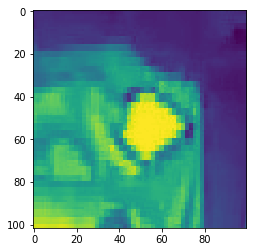

In [2]:
img = cv2.imread("cellphone-0.jpg",0)
plt.imshow(img)

In [3]:
img2 = cv2.resize(img, (100,100))
#plt.imshow(img2)
img2 = img2.flatten()

In [4]:
from sklearn.utils import shuffle 

def simpson_train_batch_generator(x, y, bs, shape):
    x_train = np.array([]).reshape((0, shape))
    y_train = np.array([]).reshape((0, y.shape[1]))
    while True:
        new_ind = shuffle(range(len(x)))
        x = x.take(new_ind)
        y = np.take(y, new_ind, axis=0)
        for i in range(len(x)):
            dir_img =  x.img.iloc[i]
            name = x.take([i])['img']
            img = cv2.imread(dir_img,0)
            img = cv2.resize(img, (100,100))
            x_train = np.row_stack([x_train, img.flatten()])
            y_train = np.row_stack([y_train, y[i]])
            if x_train.shape[0] == bs:
                x_batch = x_train.copy()
                x_batch /= 255.
                y_batch = y_train.copy()
                x_train = np.array([]).reshape((0 ,shape))
                y_train = np.array([]).reshape((0 ,y.shape[1]))        
                yield x_batch, y_batch

In [5]:
path = "D:/TruckDriver/darkflow/mlp-training"
file = open("csv/truck_driver.csv" ,'w')
file.truncate(0)
file.write("img")
file.write(",")
file.write("class")
file.write("\n")
for f in os.listdir(path):
    if '.jpg' in f:
        if 'cellphone' in f:
            file.write(f)
            file.write(",")
            file.write("cellphone")
            file.write("\n")
        else:
            file.write(f)
            file.write(",")
            file.write("others")
            file.write("\n")
file.close()


In [6]:
imv_csv = pd.read_csv("csv/truck_driver.csv")
print(imv_csv.head)

<bound method NDFrame.head of                           img      class
0             cellphone-0.jpg  cellphone
1             cellphone-1.jpg  cellphone
2            cellphone-10.jpg  cellphone
3           cellphone-100.jpg  cellphone
4           cellphone-101.jpg  cellphone
5           cellphone-102.jpg  cellphone
6           cellphone-103.jpg  cellphone
7           cellphone-104.jpg  cellphone
8           cellphone-105.jpg  cellphone
9           cellphone-106.jpg  cellphone
10          cellphone-107.jpg  cellphone
11          cellphone-108.jpg  cellphone
12          cellphone-109.jpg  cellphone
13           cellphone-11.jpg  cellphone
14          cellphone-110.jpg  cellphone
15          cellphone-111.jpg  cellphone
16          cellphone-112.jpg  cellphone
17          cellphone-113.jpg  cellphone
18          cellphone-114.jpg  cellphone
19          cellphone-115.jpg  cellphone
20          cellphone-116.jpg  cellphone
21          cellphone-117.jpg  cellphone
22          cellphone-118.j

In [7]:
class_y = pd.get_dummies(imv_csv['class'], '').as_matrix()#將label做 one_hot encoding
print(class_y)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]

C:\Users\Yuga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [10]:
#x_train_list, y_train = imv_csv, class_y #資料切割
#print(x_train_list)
x_train_list, x_test, y_train, y_test = train_test_split(imv_csv,class_y,test_size=0.25, random_state=42)
print(x_train_list)

                          img      class
393  paper-20180626_15_30.jpg     others
287     cup-20180628_3_71.jpg     others
16          cellphone-112.jpg  cellphone
422  paper-20180628_23_65.jpg     others
430  paper-20180629_21_59.jpg     others
352   paper-20180625_4_76.jpg     others
3           cellphone-100.jpg  cellphone
18          cellphone-114.jpg  cellphone
437    paper-20180630_0_0.jpg     others
60          cellphone-152.jpg  cellphone
425  paper-20180628_24_68.jpg     others
268    cup-20180628_21_56.jpg     others
176    cup-20180627_13_23.jpg     others
63          cellphone-155.jpg  cellphone
110           cellphone-4.jpg  cellphone
289     cup-20180628_4_73.jpg     others
225    cup-20180628_11_13.jpg     others
29          cellphone-124.jpg  cellphone
196    cup-20180627_18_43.jpg     others
195    cup-20180627_18_42.jpg     others
26          cellphone-121.jpg  cellphone
7           cellphone-104.jpg  cellphone
415  paper-20180628_10_11.jpg     others
108          cel

In [11]:
tf.reset_default_graph()

In [12]:
#### define placeholder ####
input_data = tf.placeholder(dtype=tf.float32, 
                           shape=[None, img2.shape[0]],
                           name='input_data') #用來接 feature 資料進入 tensorflow 

y_true = tf.placeholder(dtype=tf.float32, 
                        shape=[None, y_train.shape[1]],
                        name='y_true') #用來接 label 資料進入 tensorflow 

In [13]:
#### define variables(weight/bias) ####
x1 = tf.layers.dense(input_data, 256, activation=tf.nn.sigmoid, name='hidden1') #第一層hidden layer
x2 = tf.layers.dense(x1, 128, activation=tf.nn.sigmoid, name='hidden2') #第二層hidden layer
x3 = tf.layers.dense(x2, 64, activation=tf.nn.sigmoid, name='hidden3')#第三層hidden layer
out = tf.layers.dense(x3, y_train.shape[1], name='output')# output layer

y_pred = out

In [14]:
#### calculate loss ####
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [15]:
#### optimize variables ####
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
update = opt.minimize(loss)

In [16]:
#### init ####
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [17]:
tf.global_variables() ## 檢查 graph 裏的 global variables

[<tf.Variable 'hidden1/kernel:0' shape=(10000, 256) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'hidden2/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'hidden2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'hidden3/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'hidden3/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'output/kernel:0' shape=(64, 2) dtype=float32_ref>,
 <tf.Variable 'output/bias:0' shape=(2,) dtype=float32_ref>]

In [18]:
from tqdm import tqdm_notebook #用來顯示進度條的套件
from sklearn.metrics import accuracy_score


#epoch = 50 #要跑多少epoch
epoch = 0
bs = 32 #設定看過幾筆資料走一次更新(batch size)
update_per_epoch = 100 #一個epoch要跑幾個batch
'''因為我們現在是用generator產生新的batch，所以我們要自行給定一個epoch要跑幾個batch,
當然也可以另外修改程式讓generator回傳適合的batch數(total number of data/batch size)'''

tr_loss = list() #準備一個空的list用來存training過程中的loss值
tr_acc = list() #準備一個空的list用來存training過程中的準確率
train_gen = simpson_train_batch_generator(x_train_list, y_train, bs, img2.shape[0])

print('start modelling!')

#for i in range(epoch):
while True:    
    #### calculate training loss & update variables ####
    training_loss = 0 #用來計算epoch內所有batch loss的平均值，所以在每個epoch一開始要歸零
    training_acc = 0#用來計算epoch內所有batch acc的平均值，所以在每個epoch一開始要歸零
    bar = tqdm_notebook(range(update_per_epoch)) #外面的tqdm是進度條的function
    batch_num = 0
    epoch += 1
    for j in bar:
        
        
        x_batch, y_batch = next(train_gen) #我們是用yield來寫generator,所以用next取得下一筆資料
        
        tr_pred, training_loss_batch, _ = sess.run([y_pred, loss, update], feed_dict={
            input_data:x_batch,
            y_true:y_batch
        })
        
        training_loss += training_loss_batch
        
        #training_acc_batch = accuracy_score(np.argmax(y_batch, axis=1), np.argmax(tr_pred, axis=1))
        training_acc_batch = f1_score(np.argmax(y_batch, axis=1), np.argmax(tr_pred, axis=1), average='binary')
        if sum(np.argmax(tr_pred, axis=1)) == bs:
            batch_num += 1
        
        training_acc += training_acc_batch
        
        if j % 5 == 0:
            bar.set_description('loss: %.4g' % training_loss_batch) 
            #每5次batch更新顯示的batch loss(進度條前面)

    training_loss /= update_per_epoch
    training_acc /= update_per_epoch
    
    tr_loss.append(training_loss)
    tr_acc.append(training_acc)
    print(str(batch_num))
    print('epoch {epochs}: training loss {training_loss}'.format(
            epochs=epoch, 
            training_loss=training_loss))#每個epoch結束後顯示目前的的training loss
    if epoch%200==0:
        saver = tf.train.Saver()
        #先指定主路徑
        maindir="D:/TruckDriver/darkflow/mlp-training/"
        if not os.path.isdir(maindir):
            os.makedirs(maindir)
            os.chdir(maindir)
        else:
            os.chdir(maindir)
        #再指定存檔相對路徑存檔
        saver.save(sess, "saved_models/model"+"-"+str(epoch)+".ckpt")
    if epoch == 2000:
        break
    


start modelling!



100
epoch 1: training loss 0.7971233183145523



100
epoch 2: training loss 0.6822382962703705



100
epoch 3: training loss 0.6615412336587906



100
epoch 4: training loss 0.6592103165388107



100
epoch 5: training loss 0.6597181582450866



100
epoch 6: training loss 0.6586039233207702



100
epoch 7: training loss 0.6591661304235459



100
epoch 8: training loss 0.6566217851638794



100
epoch 9: training loss 0.6577506762742996



100
epoch 10: training loss 0.6585187840461731



100
epoch 11: training loss 0.655312350988388



100
epoch 12: training loss 0.6573727065324784



100
epoch 13: training loss 0.656609777212143



100
epoch 14: training loss 0.6537992191314698



100
epoch 15: training loss 0.6553083407878876



100
epoch 16: training loss 0.6529336720705032



100
epoch 17: training loss 0.6552064615488052



100
epoch 18: training loss 0.6534431046247482



100
epoch 19: training loss 0.6535479837656021



100
epoch 20: training loss 0.6514465641975403



100
epoch 21: training loss 0.6520821070671081



100
epoch 22: training loss 0.6508165031671524



100
epoch 23: training loss 0.6519458162784576



100
epoch 24: training loss 0.6516931849718094



100
epoch 25: training loss 0.6481156688928604



100
epoch 26: training loss 0.6504652374982833



100
epoch 27: training loss 0.6496165317296981



100
epoch 28: training loss 0.6469264960289002



100
epoch 29: training loss 0.6481046086549759



100
epoch 30: training loss 0.6474681919813157



100
epoch 31: training loss 0.6478187191486359



100
epoch 32: training loss 0.6472888618707657



100
epoch 33: training loss 0.6459565502405167



100
epoch 34: training loss 0.644212976694107



100
epoch 35: training loss 0.6459916138648987



100
epoch 36: training loss 0.6438630533218384



100
epoch 37: training loss 0.6453536820411682



100
epoch 38: training loss 0.6429211890697479



100
epoch 39: training loss 0.6435647988319397



100
epoch 40: training loss 0.6437421804666519



100
epoch 41: training loss 0.6414570313692093



100
epoch 42: training loss 0.6414256131649018



100
epoch 43: training loss 0.6415733206272125



100
epoch 44: training loss 0.6394188180565834



100
epoch 45: training loss 0.6410221564769745



100
epoch 46: training loss 0.640438541173935



100
epoch 47: training loss 0.638595593571663



100
epoch 48: training loss 0.637662832736969



100
epoch 49: training loss 0.6376289826631546



100
epoch 50: training loss 0.6384384316205979



100
epoch 51: training loss 0.6358251965045929



100
epoch 52: training loss 0.6366005545854568



100
epoch 53: training loss 0.6349904578924179



100
epoch 54: training loss 0.6364805555343628



100
epoch 55: training loss 0.6333394157886505



100
epoch 56: training loss 0.6350573283433915



100
epoch 57: training loss 0.6334332031011581



100
epoch 58: training loss 0.6321343421936035



100
epoch 59: training loss 0.6323415040969849



100
epoch 60: training loss 0.6314249813556672



100
epoch 61: training loss 0.6302453643083572



100
epoch 62: training loss 0.6308939719200134



100
epoch 63: training loss 0.628292880654335



100
epoch 64: training loss 0.6294750332832336



100
epoch 65: training loss 0.628539742231369



100
epoch 66: training loss 0.6283056402206421



100
epoch 67: training loss 0.6259288746118545



100
epoch 68: training loss 0.626151270866394



100
epoch 69: training loss 0.6261065405607223



100
epoch 70: training loss 0.6237937670946121



100
epoch 71: training loss 0.6229656821489334



100
epoch 72: training loss 0.6228770226240158



100
epoch 73: training loss 0.6236165857315064



100
epoch 74: training loss 0.6206993687152863



100
epoch 75: training loss 0.6218544453382492



100
epoch 76: training loss 0.6186332255601883



100
epoch 77: training loss 0.6184197735786437



100
epoch 78: training loss 0.6200364965200424



100
epoch 79: training loss 0.6169167309999466



100
epoch 80: training loss 0.6177730804681778



100
epoch 81: training loss 0.6141960644721984



100
epoch 82: training loss 0.6157528680562973



100
epoch 83: training loss 0.6117525434494019



100
epoch 84: training loss 0.6139087170362473



100
epoch 85: training loss 0.6105924832820893



100
epoch 86: training loss 0.6129773515462875



100
epoch 87: training loss 0.6086668169498444



100
epoch 88: training loss 0.6071749818325043



100
epoch 89: training loss 0.6103152239322662



100
epoch 90: training loss 0.6055858260393143



100
epoch 91: training loss 0.6045801931619644



100
epoch 92: training loss 0.605378857254982



100
epoch 93: training loss 0.6017726147174836



100
epoch 94: training loss 0.6028568929433823



100
epoch 95: training loss 0.6012846946716308



100
epoch 96: training loss 0.5998957943916321



100
epoch 97: training loss 0.597729260623455



100
epoch 98: training loss 0.5976139903068542



100
epoch 99: training loss 0.5960690981149673



100
epoch 100: training loss 0.5948607891798019



100
epoch 101: training loss 0.5928033185005188



100
epoch 102: training loss 0.5905288064479828



100
epoch 103: training loss 0.592102672457695



100
epoch 104: training loss 0.5887859132885933



100
epoch 105: training loss 0.5878685814142227



100
epoch 106: training loss 0.5862320029735565



99
epoch 107: training loss 0.5861687862873077



94
epoch 108: training loss 0.5819973421096801



89
epoch 109: training loss 0.5819884580373764



90
epoch 110: training loss 0.5793890452384949



79
epoch 111: training loss 0.5781616044044494



64
epoch 112: training loss 0.5774971899390221



44
epoch 113: training loss 0.5741032919287682



37
epoch 114: training loss 0.5747681167721749



35
epoch 115: training loss 0.5720949301123619



20
epoch 116: training loss 0.5686395478248596



16
epoch 117: training loss 0.5694305011630059



5
epoch 118: training loss 0.565852464735508



9
epoch 119: training loss 0.5647271817922592



3
epoch 120: training loss 0.5631067162752151



3
epoch 121: training loss 0.5610056599974632



5
epoch 122: training loss 0.5603628161549569



3
epoch 123: training loss 0.5555281248688698



1
epoch 124: training loss 0.5544730320572853



2
epoch 125: training loss 0.5534353789687156



2
epoch 126: training loss 0.5509955576062202



3
epoch 127: training loss 0.5481278729438782



1
epoch 128: training loss 0.5472104501724243



0
epoch 129: training loss 0.5441162940859795



0
epoch 130: training loss 0.5426495078206063



0
epoch 131: training loss 0.5399200129508972



1
epoch 132: training loss 0.5384712293744087



0
epoch 133: training loss 0.534992048740387



0
epoch 134: training loss 0.533159402012825



0
epoch 135: training loss 0.5312494829297065



0
epoch 136: training loss 0.5277593725919724



0
epoch 137: training loss 0.5267164370417595



0
epoch 138: training loss 0.5234463202953339



0
epoch 139: training loss 0.5222248515486717



0
epoch 140: training loss 0.5186221861839294



0
epoch 141: training loss 0.5163684424757957



0
epoch 142: training loss 0.5139195477962494



0
epoch 143: training loss 0.510791826248169



0
epoch 144: training loss 0.5083011299371719



0
epoch 145: training loss 0.5058026021718979



0
epoch 146: training loss 0.503494504392147



0
epoch 147: training loss 0.5000158375501633



0
epoch 148: training loss 0.4993292525410652



0
epoch 149: training loss 0.4941487777233124



0
epoch 150: training loss 0.4928773418068886



0
epoch 151: training loss 0.4909229838848114



0
epoch 152: training loss 0.4866067352890968



0
epoch 153: training loss 0.48360218524932863



0
epoch 154: training loss 0.48185211151838303



0
epoch 155: training loss 0.4786978924274445



0
epoch 156: training loss 0.47630477845668795



0
epoch 157: training loss 0.4721167674660683



0
epoch 158: training loss 0.46884181946516035



0
epoch 159: training loss 0.4675117290019989



0
epoch 160: training loss 0.4644646289944649



0
epoch 161: training loss 0.45996432870626447



0
epoch 162: training loss 0.45808191686868666



0
epoch 163: training loss 0.45580435067415237



0
epoch 164: training loss 0.45306271225214007



0
epoch 165: training loss 0.44781278491020204



0
epoch 166: training loss 0.4464995762705803



0
epoch 167: training loss 0.44249435514211655



0
epoch 168: training loss 0.4405436509847641



0
epoch 169: training loss 0.43634249836206435



0
epoch 170: training loss 0.43381593495607373



0
epoch 171: training loss 0.43095064014196394



0
epoch 172: training loss 0.4264875653386116



0
epoch 173: training loss 0.42339914679527285



0
epoch 174: training loss 0.42335783392190934



0
epoch 175: training loss 0.4178443220257759



0
epoch 176: training loss 0.41588424384593964



0
epoch 177: training loss 0.4110646504163742



0
epoch 178: training loss 0.4097562697529793



0
epoch 179: training loss 0.40496264785528185



0
epoch 180: training loss 0.40101164251565935



0
epoch 181: training loss 0.3994633659720421



0
epoch 182: training loss 0.3966878029704094



0
epoch 183: training loss 0.3917184260487556



0
epoch 184: training loss 0.3901288801431656



0
epoch 185: training loss 0.3861350929737091



0
epoch 186: training loss 0.38354917109012604



0
epoch 187: training loss 0.37864537864923475



1
epoch 188: training loss 0.37681895852088926



0
epoch 189: training loss 0.37326561003923414



0
epoch 190: training loss 0.3699969083070755



0
epoch 191: training loss 0.3654238691926002



0
epoch 192: training loss 0.3639949154853821



0
epoch 193: training loss 0.3589408707618713



0
epoch 194: training loss 0.3574632224440575



0
epoch 195: training loss 0.35423202097415923



0
epoch 196: training loss 0.3501174372434616



0
epoch 197: training loss 0.34792878717184067



0
epoch 198: training loss 0.3411327454447746



0
epoch 199: training loss 0.3413393774628639



0
epoch 200: training loss 0.33501944959163665



0
epoch 201: training loss 0.3342981806397438



0
epoch 202: training loss 0.3310155369341373



0
epoch 203: training loss 0.3272904850542545



0
epoch 204: training loss 0.3232975998520851



0
epoch 205: training loss 0.3198879577219486



0
epoch 206: training loss 0.31829032927751544



0
epoch 207: training loss 0.31282198876142503



0
epoch 208: training loss 0.3111127613484859



0
epoch 209: training loss 0.3074179258942604



0
epoch 210: training loss 0.3023834627866745



0
epoch 211: training loss 0.30146596387028696



0
epoch 212: training loss 0.2959595187008381



0
epoch 213: training loss 0.2939110088348389



0
epoch 214: training loss 0.292070305198431



0
epoch 215: training loss 0.2870922765135765



0
epoch 216: training loss 0.2837862628698349



0
epoch 217: training loss 0.2795020496845245



0
epoch 218: training loss 0.2789404956996441



0
epoch 219: training loss 0.27442988827824594



0
epoch 220: training loss 0.2716889236867428



0
epoch 221: training loss 0.26704708322882653



0
epoch 222: training loss 0.26454578518867494



0
epoch 223: training loss 0.26033306315541266



0
epoch 224: training loss 0.2599744611978531



0
epoch 225: training loss 0.25520239427685737



0
epoch 226: training loss 0.2515177607536316



0
epoch 227: training loss 0.249828360080719



0
epoch 228: training loss 0.24735479205846786



0
epoch 229: training loss 0.2424950422346592



0
epoch 230: training loss 0.23971278250217437



0
epoch 231: training loss 0.23770204082131385



0
epoch 232: training loss 0.23337934792041778



0
epoch 233: training loss 0.2321445082128048



0
epoch 234: training loss 0.22975066363811492



0
epoch 235: training loss 0.2237202250957489



0
epoch 236: training loss 0.22155826777219773



0
epoch 237: training loss 0.22145950719714164



0
epoch 238: training loss 0.21512389659881592



0
epoch 239: training loss 0.21421792939305306



0
epoch 240: training loss 0.21165428534150124



0
epoch 241: training loss 0.20857985958456993



0
epoch 242: training loss 0.20646736085414885



0
epoch 243: training loss 0.20200133822858335



0
epoch 244: training loss 0.20143593914806843



0
epoch 245: training loss 0.19824011489748955



0
epoch 246: training loss 0.19596408054232597



0
epoch 247: training loss 0.19193366467952727



0
epoch 248: training loss 0.1900505194813013



0
epoch 249: training loss 0.18846965283155442



0
epoch 250: training loss 0.18630724750459193



0
epoch 251: training loss 0.18305170767009257



0
epoch 252: training loss 0.18039986476302147



0
epoch 253: training loss 0.17868826001882554



0
epoch 254: training loss 0.17733871959149838



0
epoch 255: training loss 0.1729980368167162



0
epoch 256: training loss 0.1715376477688551



0
epoch 257: training loss 0.16962556466460227



0
epoch 258: training loss 0.16757358454167842



0
epoch 259: training loss 0.16483873091638088



0
epoch 260: training loss 0.16341892823576928



0
epoch 261: training loss 0.1605546224862337



0
epoch 262: training loss 0.15869016230106353



0
epoch 263: training loss 0.15749862253665925



0
epoch 264: training loss 0.1544996800273657



0
epoch 265: training loss 0.15263297356665134



0
epoch 266: training loss 0.152331640124321



0
epoch 267: training loss 0.14874653965234758



0
epoch 268: training loss 0.14764593236148357



0
epoch 269: training loss 0.1450813043117523



0
epoch 270: training loss 0.14398588329553605



0
epoch 271: training loss 0.141227021291852



0
epoch 272: training loss 0.14050365515053273



0
epoch 273: training loss 0.1384585902839899



0
epoch 274: training loss 0.13670937463641167



0
epoch 275: training loss 0.13560644090175628



0
epoch 276: training loss 0.134012016877532



0
epoch 277: training loss 0.1300151053071022



0
epoch 278: training loss 0.13150102384388446



0
epoch 279: training loss 0.12902980238199235



0
epoch 280: training loss 0.12644580356776713



0
epoch 281: training loss 0.12492526523768901



0
epoch 282: training loss 0.12462412178516388



0
epoch 283: training loss 0.12265602774918079



0
epoch 284: training loss 0.12156379669904709



0
epoch 285: training loss 0.11954163555055856



0
epoch 286: training loss 0.11808706887066364



0
epoch 287: training loss 0.11669355034828185



0
epoch 288: training loss 0.11656205266714097



0
epoch 289: training loss 0.11340265028178692



0
epoch 290: training loss 0.11269044015556574



0
epoch 291: training loss 0.11205007258802652



0
epoch 292: training loss 0.1106349477916956



0
epoch 293: training loss 0.10869008339941502



0
epoch 294: training loss 0.10745668992400169



0
epoch 295: training loss 0.10673344366252423



0
epoch 296: training loss 0.10605023063719272



0
epoch 297: training loss 0.10377239234745503



0
epoch 298: training loss 0.10309644762426615



0
epoch 299: training loss 0.10151901468634605



0
epoch 300: training loss 0.10125727497041226



0
epoch 301: training loss 0.09972594067454338



0
epoch 302: training loss 0.0989766963943839



0
epoch 303: training loss 0.0971584689989686



0
epoch 304: training loss 0.09539285354316235



0
epoch 305: training loss 0.0966261014714837



0
epoch 306: training loss 0.09413861725479364



0
epoch 307: training loss 0.09240807220339775



0
epoch 308: training loss 0.09258426446467638



0
epoch 309: training loss 0.09229300763458013



0
epoch 310: training loss 0.08983745135366916



0
epoch 311: training loss 0.08968464344739914



0
epoch 312: training loss 0.08817027721554041



0
epoch 313: training loss 0.08740908306092024



0
epoch 314: training loss 0.0866452730819583



0
epoch 315: training loss 0.08556421991437674



0
epoch 316: training loss 0.08443080347031355



0
epoch 317: training loss 0.08433494683355093



0
epoch 318: training loss 0.08354606326669455



0
epoch 319: training loss 0.082163195759058



0
epoch 320: training loss 0.08096993107348681



0
epoch 321: training loss 0.08036483488976956



0
epoch 322: training loss 0.08051010940223932



0
epoch 323: training loss 0.07863709937781095



0
epoch 324: training loss 0.07802377820014954



0
epoch 325: training loss 0.07728319466114045



0
epoch 326: training loss 0.07682804077863693



0
epoch 327: training loss 0.07477293286472558



0
epoch 328: training loss 0.07582072846591473



0
epoch 329: training loss 0.07400191988795995



0
epoch 330: training loss 0.07433730013668537



0
epoch 331: training loss 0.07242914211004972



0
epoch 332: training loss 0.07216556176543236



0
epoch 333: training loss 0.07157637741416693



0
epoch 334: training loss 0.07072041526436806



0
epoch 335: training loss 0.07037965718656779



0
epoch 336: training loss 0.06904670812189578



0
epoch 337: training loss 0.06898164890706539



0
epoch 338: training loss 0.06793494371697306



0
epoch 339: training loss 0.06769307319074869



0
epoch 340: training loss 0.06675079829990864



0
epoch 341: training loss 0.06620614061132074



0
epoch 342: training loss 0.06561236977577209



0
epoch 343: training loss 0.06473082615062595



0
epoch 344: training loss 0.06468265078961849



0
epoch 345: training loss 0.06368105733767151



0
epoch 346: training loss 0.06306759934872389



0
epoch 347: training loss 0.06296690344810486



0
epoch 348: training loss 0.06189830332994461



0
epoch 349: training loss 0.061962345205247404



0
epoch 350: training loss 0.06115362085402012



0
epoch 351: training loss 0.059859661068767306



0
epoch 352: training loss 0.06099426742643118



0
epoch 353: training loss 0.058124684263020754



0
epoch 354: training loss 0.05908943083137274



0
epoch 355: training loss 0.05879919651895762



0
epoch 356: training loss 0.057757359594106675



0
epoch 357: training loss 0.05761440360918641



0
epoch 358: training loss 0.055980410743504766



0
epoch 359: training loss 0.05700407588854432



0
epoch 360: training loss 0.05540672030299902



0
epoch 361: training loss 0.056415717527270315



0
epoch 362: training loss 0.054425193015486005



0
epoch 363: training loss 0.05493388593196869



0
epoch 364: training loss 0.05343874065205455



0
epoch 365: training loss 0.053623761013150216



0
epoch 366: training loss 0.05348844826221466



0
epoch 367: training loss 0.052553210109472275



0
epoch 368: training loss 0.0520655514113605



0
epoch 369: training loss 0.052067180164158344



0
epoch 370: training loss 0.05152706392109394



0
epoch 371: training loss 0.05092233549803495



0
epoch 372: training loss 0.05073001379147172



0
epoch 373: training loss 0.05020019246265292



0
epoch 374: training loss 0.05021856179460883



0
epoch 375: training loss 0.0494961928576231



0
epoch 376: training loss 0.04836272838525474



0
epoch 377: training loss 0.048590959459543226



0
epoch 378: training loss 0.048456999287009236



0
epoch 379: training loss 0.047900285702198744



0
epoch 380: training loss 0.04723032480105758



0
epoch 381: training loss 0.047431486528366804



0
epoch 382: training loss 0.04644431419670582



0
epoch 383: training loss 0.046479980517178776



0
epoch 384: training loss 0.046205267906188965



0
epoch 385: training loss 0.045529370419681074



0
epoch 386: training loss 0.04514992706477642



0
epoch 387: training loss 0.04526770988479257



0
epoch 388: training loss 0.04432977475225926



0
epoch 389: training loss 0.044492597319185735



0
epoch 390: training loss 0.044415333215147255



0
epoch 391: training loss 0.04410241102799773



0
epoch 392: training loss 0.04308993486687541



0
epoch 393: training loss 0.04298104856163263



0
epoch 394: training loss 0.04278028089553118



0
epoch 395: training loss 0.0423122345469892



0
epoch 396: training loss 0.042060815393924714



0
epoch 397: training loss 0.041944422125816345



0
epoch 398: training loss 0.04156014281325042



0
epoch 399: training loss 0.04096019210293889



0
epoch 400: training loss 0.041300793457776305



0
epoch 401: training loss 0.040425422787666324



0
epoch 402: training loss 0.04022205602377653



0
epoch 403: training loss 0.04050666578114033



0
epoch 404: training loss 0.03947881661355496



0
epoch 405: training loss 0.039637570651248094



0
epoch 406: training loss 0.03948943117633462



0
epoch 407: training loss 0.03862407574430108



0
epoch 408: training loss 0.039085074737668035



0
epoch 409: training loss 0.038221774138510224



0
epoch 410: training loss 0.03801319630816579



0
epoch 411: training loss 0.03808576760813594



0
epoch 412: training loss 0.037580424062907694



0
epoch 413: training loss 0.03744238130748272



0
epoch 414: training loss 0.03695755086839199



0
epoch 415: training loss 0.037055401485413315



0
epoch 416: training loss 0.036575942169874906



0
epoch 417: training loss 0.03678158327937126



0
epoch 418: training loss 0.035877287397161124



0
epoch 419: training loss 0.03617271149531007



0
epoch 420: training loss 0.03577158438041806



0
epoch 421: training loss 0.03534235982224345



0
epoch 422: training loss 0.03523525996133685



0
epoch 423: training loss 0.035071690017357465



0
epoch 424: training loss 0.034403432365506886



0
epoch 425: training loss 0.034870062544941904



0
epoch 426: training loss 0.03431668812409043



0
epoch 427: training loss 0.033942790534347296



0
epoch 428: training loss 0.03366701864637434



0
epoch 429: training loss 0.03404400051571429



0
epoch 430: training loss 0.0331229858379811



0
epoch 431: training loss 0.033790075527504085



0
epoch 432: training loss 0.0329104311298579



0
epoch 433: training loss 0.032569689974188805



0
epoch 434: training loss 0.03299852652475238



0
epoch 435: training loss 0.032272634357213975



0
epoch 436: training loss 0.03271808575838804



0
epoch 437: training loss 0.03167111194692552



0
epoch 438: training loss 0.03194527587853372



0
epoch 439: training loss 0.031801228560507294



0
epoch 440: training loss 0.03134602182544768



0
epoch 441: training loss 0.03143142575398088



0
epoch 442: training loss 0.030794322453439237



0
epoch 443: training loss 0.030922302175313235



0
epoch 444: training loss 0.030452619949355723



0
epoch 445: training loss 0.030882889833301307



0
epoch 446: training loss 0.03034525320865214



0
epoch 447: training loss 0.030337450057268144



0
epoch 448: training loss 0.029782797377556562



0
epoch 449: training loss 0.03005195304751396



0
epoch 450: training loss 0.029085132088512183



0
epoch 451: training loss 0.029786181151866913



0
epoch 452: training loss 0.02928884444758296



0
epoch 453: training loss 0.02846744201146066



0
epoch 454: training loss 0.029542889911681414



0
epoch 455: training loss 0.028842128412798047



0
epoch 456: training loss 0.02834705307148397



0
epoch 457: training loss 0.02843701245263219



0
epoch 458: training loss 0.02815023362636566



0
epoch 459: training loss 0.028496674792841077



0
epoch 460: training loss 0.02764501690864563



0
epoch 461: training loss 0.028109016334638



0
epoch 462: training loss 0.027525452822446825



0
epoch 463: training loss 0.02721317688934505



0
epoch 464: training loss 0.02749505642801523



0
epoch 465: training loss 0.027079320354387162



0
epoch 466: training loss 0.02701295687817037



0
epoch 467: training loss 0.026970448410138487



0
epoch 468: training loss 0.02644336530007422



0
epoch 469: training loss 0.026630313722416758



0
epoch 470: training loss 0.026319786263629793



0
epoch 471: training loss 0.026535793375223875



0
epoch 472: training loss 0.026241822177544238



0
epoch 473: training loss 0.025903030354529618



0
epoch 474: training loss 0.025757139110937716



0
epoch 475: training loss 0.025696817114949227



0
epoch 476: training loss 0.025689442167058586



0
epoch 477: training loss 0.025173370502889158



0
epoch 478: training loss 0.025369189344346524



0
epoch 479: training loss 0.02493133008480072



0
epoch 480: training loss 0.025671714767813682



0
epoch 481: training loss 0.024557696394622325



0
epoch 482: training loss 0.024338963571935893



0
epoch 483: training loss 0.02497253400273621



0
epoch 484: training loss 0.02418330829590559



0
epoch 485: training loss 0.024623614572919904



0
epoch 486: training loss 0.024386983662843705



0
epoch 487: training loss 0.024207828305661677



0
epoch 488: training loss 0.023911123517900704



0
epoch 489: training loss 0.023620224762707948



0
epoch 490: training loss 0.02389493999071419



0
epoch 491: training loss 0.02373610554262996



0
epoch 492: training loss 0.02330370618030429



0
epoch 493: training loss 0.023217628160491586



0
epoch 494: training loss 0.02358479348011315



0
epoch 495: training loss 0.023000886365771293



0
epoch 496: training loss 0.022896854961290954



0
epoch 497: training loss 0.022540036225691437



0
epoch 498: training loss 0.023298230981454254



0
epoch 499: training loss 0.022350800847634675



0
epoch 500: training loss 0.02249355096835643



0
epoch 501: training loss 0.022490642499178648



0
epoch 502: training loss 0.022140148459002376



0
epoch 503: training loss 0.0220103646395728



0
epoch 504: training loss 0.022386100571602584



0
epoch 505: training loss 0.021708039538934826



0
epoch 506: training loss 0.02214975825510919



0
epoch 507: training loss 0.02160049288533628



0
epoch 508: training loss 0.02148065107874572



0
epoch 509: training loss 0.02144614029210061



0
epoch 510: training loss 0.02151086288038641



0
epoch 511: training loss 0.021161100515164434



0
epoch 512: training loss 0.021564379329793156



0
epoch 513: training loss 0.02097507717087865



0
epoch 514: training loss 0.021191191649995743



0
epoch 515: training loss 0.020869159800931812



0
epoch 516: training loss 0.020776483728550375



0
epoch 517: training loss 0.02060409789904952



0
epoch 518: training loss 0.020615185042843223



0
epoch 519: training loss 0.020399838662706317



0
epoch 520: training loss 0.020383205572143195



0
epoch 521: training loss 0.020419436851516367



0
epoch 522: training loss 0.0199997074669227



0
epoch 523: training loss 0.020225317389704286



0
epoch 524: training loss 0.019883782044053076



0
epoch 525: training loss 0.019687581933103503



0
epoch 526: training loss 0.019953781035728754



0
epoch 527: training loss 0.01981796688400209



0
epoch 528: training loss 0.01969400593545288



0
epoch 529: training loss 0.019545868039131165



0
epoch 530: training loss 0.019323356254026293



0
epoch 531: training loss 0.01922844443935901



0
epoch 532: training loss 0.0191083002416417



0
epoch 533: training loss 0.01938897604588419



0
epoch 534: training loss 0.019223983874544503



0
epoch 535: training loss 0.018993510832078755



0
epoch 536: training loss 0.01890852406155318



0
epoch 537: training loss 0.018531947517767548



0
epoch 538: training loss 0.018799212244339288



0
epoch 539: training loss 0.018704538401216268



0
epoch 540: training loss 0.018736358573660253



0
epoch 541: training loss 0.01812204378657043



0
epoch 542: training loss 0.018569814544171094



0
epoch 543: training loss 0.01809939009603113



0
epoch 544: training loss 0.018463618722744286



0
epoch 545: training loss 0.017978710564784707



0
epoch 546: training loss 0.018282464775256812



0
epoch 547: training loss 0.017932194769382476



0
epoch 548: training loss 0.017920116856694222



0
epoch 549: training loss 0.01756387059111148



0
epoch 550: training loss 0.01778367496561259



0
epoch 551: training loss 0.01773469177540392



0
epoch 552: training loss 0.017381554963067175



0
epoch 553: training loss 0.01745372112840414



0
epoch 554: training loss 0.017582054249942303



0
epoch 555: training loss 0.017269573830999432



0
epoch 556: training loss 0.017529738845769315



0
epoch 557: training loss 0.01712319937068969



0
epoch 558: training loss 0.016886898293159903



0
epoch 559: training loss 0.017076888089068234



0
epoch 560: training loss 0.016971783824265004



0
epoch 561: training loss 0.0167464695032686



0
epoch 562: training loss 0.01688791555352509



0
epoch 563: training loss 0.016729749543592333



0
epoch 564: training loss 0.016546890777535735



0
epoch 565: training loss 0.01684366423636675



0
epoch 566: training loss 0.016357552078552544



0
epoch 567: training loss 0.016425831308588386



0
epoch 568: training loss 0.016594484322704373



0
epoch 569: training loss 0.01604578929487616



0
epoch 570: training loss 0.016160348188132046



0
epoch 571: training loss 0.016383642735891043



0
epoch 572: training loss 0.0159734267834574



0
epoch 573: training loss 0.01590192918665707



0
epoch 574: training loss 0.01617293297778815



0
epoch 575: training loss 0.015730681591667236



0
epoch 576: training loss 0.01575370568782091



0
epoch 577: training loss 0.015868449481204153



0
epoch 578: training loss 0.015558940880000592



0
epoch 579: training loss 0.015626796730794014



0
epoch 580: training loss 0.015705324611626565



0
epoch 581: training loss 0.01542012371122837



0
epoch 582: training loss 0.015488823945634066



0
epoch 583: training loss 0.015337118580937385



0
epoch 584: training loss 0.015297805755399168



0
epoch 585: training loss 0.01513588816858828



0
epoch 586: training loss 0.015292380461469293



0
epoch 587: training loss 0.015126185240224004



0
epoch 588: training loss 0.014987388732843101



0
epoch 589: training loss 0.01500053213443607



0
epoch 590: training loss 0.014911857624538243



0
epoch 591: training loss 0.014861651258543133



0
epoch 592: training loss 0.014869396495632826



0
epoch 593: training loss 0.014528002981096506



0
epoch 594: training loss 0.014839410143904387



0
epoch 595: training loss 0.014545341660268605



0
epoch 596: training loss 0.014572141445241868



0
epoch 597: training loss 0.014559732098132373



0
epoch 598: training loss 0.014442853457294404



0
epoch 599: training loss 0.014278578541707247



0
epoch 600: training loss 0.014390991921536624



0
epoch 601: training loss 0.014290512804873288



0
epoch 602: training loss 0.014271021438762545



0
epoch 603: training loss 0.014061204134486615



0
epoch 604: training loss 0.01411239730194211



0
epoch 605: training loss 0.014153023241087795



0
epoch 606: training loss 0.013818916424643248



0
epoch 607: training loss 0.014009381104260683



0
epoch 608: training loss 0.013912827135063708



0
epoch 609: training loss 0.013905182252638043



0
epoch 610: training loss 0.013571536294184625



0
epoch 611: training loss 0.01381662385072559



0
epoch 612: training loss 0.0136016482161358



0
epoch 613: training loss 0.013734349263831973



0
epoch 614: training loss 0.013521212306804954



0
epoch 615: training loss 0.013465721104294061



0
epoch 616: training loss 0.013346002572216093



0
epoch 617: training loss 0.013573063318617642



0
epoch 618: training loss 0.013346203248947858



0
epoch 619: training loss 0.013132173549383879



0
epoch 620: training loss 0.013356574806384741



0
epoch 621: training loss 0.013064671708270907



0
epoch 622: training loss 0.013315604757517576



0
epoch 623: training loss 0.012906995434314013



0
epoch 624: training loss 0.013377919152844697



0
epoch 625: training loss 0.012786287008784711



0
epoch 626: training loss 0.012861003377474844



0
epoch 627: training loss 0.012730811941437423



0
epoch 628: training loss 0.013098473849240691



0
epoch 629: training loss 0.012789219613187014



0
epoch 630: training loss 0.012759508932940661



0
epoch 631: training loss 0.012648772117681801



0
epoch 632: training loss 0.012549074729904533



0
epoch 633: training loss 0.012761263479478657



0
epoch 634: training loss 0.012512622880749405



0
epoch 635: training loss 0.012612848631106318



0
epoch 636: training loss 0.012243130465503783



0
epoch 637: training loss 0.012555798483081162



0
epoch 638: training loss 0.012412796155549586



0
epoch 639: training loss 0.01229122030781582



0
epoch 640: training loss 0.01216807980556041



0
epoch 641: training loss 0.012211980770807714



0
epoch 642: training loss 0.01231565437745303



0
epoch 643: training loss 0.011986104489769786



0
epoch 644: training loss 0.012367340014316141



0
epoch 645: training loss 0.011957437607925385



0
epoch 646: training loss 0.012022109143435955



0
epoch 647: training loss 0.01206411512568593



0
epoch 648: training loss 0.01179637569002807



0
epoch 649: training loss 0.011855152775533498



0
epoch 650: training loss 0.011968113300390541



0
epoch 651: training loss 0.011694996894802898



0
epoch 652: training loss 0.01179623738862574



0
epoch 653: training loss 0.011779894742649049



0
epoch 654: training loss 0.011631646745372563



0
epoch 655: training loss 0.011797048025764525



0
epoch 656: training loss 0.011451228242367505



0
epoch 657: training loss 0.01140289693372324



0
epoch 658: training loss 0.011772208677139134



0
epoch 659: training loss 0.011418451047502458



0
epoch 660: training loss 0.011448732085991651



0
epoch 661: training loss 0.01119530065683648



0
epoch 662: training loss 0.011473811015021056



0
epoch 663: training loss 0.011341253886930644



0
epoch 664: training loss 0.011101498254574835



0
epoch 665: training loss 0.011375977490097285



0
epoch 666: training loss 0.011304482610430568



0
epoch 667: training loss 0.011023662174120546



0
epoch 668: training loss 0.011107979621738196



0
epoch 669: training loss 0.011180923138745129



0
epoch 670: training loss 0.010954984237905592



0
epoch 671: training loss 0.010916623519733548



0
epoch 672: training loss 0.011069650859571994



0
epoch 673: training loss 0.010830470719374716



0
epoch 674: training loss 0.010993516601156444



0
epoch 675: training loss 0.01075172060634941



0
epoch 676: training loss 0.010806305231526495



0
epoch 677: training loss 0.010898445362690835



0
epoch 678: training loss 0.010712787138763814



0
epoch 679: training loss 0.010612066767644137



0
epoch 680: training loss 0.010563962252344936



0
epoch 681: training loss 0.010769573817960919



0
epoch 682: training loss 0.010635714032687246



0
epoch 683: training loss 0.010586342930328101



0
epoch 684: training loss 0.010441380185075105



0
epoch 685: training loss 0.010310240124817937



0
epoch 686: training loss 0.01072764242067933



0
epoch 687: training loss 0.01029563055606559



0
epoch 688: training loss 0.010408671202603727



0
epoch 689: training loss 0.010191245684400201



0
epoch 690: training loss 0.010452537275850772



0
epoch 691: training loss 0.01019082314800471



0
epoch 692: training loss 0.010420801052823662



0
epoch 693: training loss 0.010131016452796758



0
epoch 694: training loss 0.01023942620959133



0
epoch 695: training loss 0.01009310134453699



0
epoch 696: training loss 0.010237739183939993



0
epoch 697: training loss 0.01000788226025179



0
epoch 698: training loss 0.009982292281929404



0
epoch 699: training loss 0.010025725048035384



0
epoch 700: training loss 0.010056786891072988



0
epoch 701: training loss 0.009818328912369906



0
epoch 702: training loss 0.009915239191614092



0
epoch 703: training loss 0.009984442270360888



0
epoch 704: training loss 0.009736913405358791



0
epoch 705: training loss 0.009744830864947289



0
epoch 706: training loss 0.009826551654841751



0
epoch 707: training loss 0.009851652015931904



0
epoch 708: training loss 0.009798582413932309



0
epoch 709: training loss 0.00959659408312291



0
epoch 710: training loss 0.009742407917510718



0
epoch 711: training loss 0.009391186439897866



0
epoch 712: training loss 0.00964676181320101



0
epoch 713: training loss 0.00970039883395657



0
epoch 714: training loss 0.009625826872652397



0
epoch 715: training loss 0.009338876865804195



0
epoch 716: training loss 0.009370548322331161



0
epoch 717: training loss 0.009685733527876437



0
epoch 718: training loss 0.0092579235159792



0
epoch 719: training loss 0.009390838840045036



0
epoch 720: training loss 0.00942199811572209



0
epoch 721: training loss 0.009386207929346711



0
epoch 722: training loss 0.009249494674149901



0
epoch 723: training loss 0.009304728959687054



0
epoch 724: training loss 0.009171920649241655



0
epoch 725: training loss 0.009256410391535609



0
epoch 726: training loss 0.009096177010796964



0
epoch 727: training loss 0.009132495408412069



0
epoch 728: training loss 0.009038004046306013



0
epoch 729: training loss 0.009258550209924579



0
epoch 730: training loss 0.009079429579433054



0
epoch 731: training loss 0.008958490830846131



0
epoch 732: training loss 0.009102644040249288



0
epoch 733: training loss 0.009033258692361414



0
epoch 734: training loss 0.008791750827804208



0
epoch 735: training loss 0.008992618015035987



0
epoch 736: training loss 0.008889524866826832



0
epoch 737: training loss 0.009003729083342477



0
epoch 738: training loss 0.008788861825596541



0
epoch 739: training loss 0.008753584361402318



0
epoch 740: training loss 0.008874325940851122



0
epoch 741: training loss 0.008841346870176493



0
epoch 742: training loss 0.008509087387938052



0
epoch 743: training loss 0.008873734775697813



0
epoch 744: training loss 0.008689489704556764



0
epoch 745: training loss 0.008661751602776348



0
epoch 746: training loss 0.008662559883669018



0
epoch 747: training loss 0.00863072793930769



0
epoch 748: training loss 0.008565226785140111



0
epoch 749: training loss 0.008543164876755327



0
epoch 750: training loss 0.00861450432566926



0
epoch 751: training loss 0.008365399623289704



0
epoch 752: training loss 0.008506882258225233



0
epoch 753: training loss 0.008535349515732378



0
epoch 754: training loss 0.008433917874936015



0
epoch 755: training loss 0.00843003678601235



0
epoch 756: training loss 0.008363112399820238



0
epoch 757: training loss 0.008369128061458469



0
epoch 758: training loss 0.00832120472798124



0
epoch 759: training loss 0.008291122984373941



0
epoch 760: training loss 0.008315483785700052



0
epoch 761: training loss 0.008336022400762887



0
epoch 762: training loss 0.008172565875574946



0
epoch 763: training loss 0.008213723341468722



0
epoch 764: training loss 0.008160990970209241



0
epoch 765: training loss 0.008230824542697518



0
epoch 766: training loss 0.008159969388507306



0
epoch 767: training loss 0.007974637526785955



0
epoch 768: training loss 0.00820233129314147



0
epoch 769: training loss 0.008029633917612956



0
epoch 770: training loss 0.008018064259085805



0
epoch 771: training loss 0.00813241360709071



0
epoch 772: training loss 0.00800587672740221



0
epoch 773: training loss 0.008041751002892852



0
epoch 774: training loss 0.008047186920884996



0
epoch 775: training loss 0.007862694088835269



0
epoch 776: training loss 0.00787728235591203



0
epoch 777: training loss 0.007907959939911962



0
epoch 778: training loss 0.007799651068635285



0
epoch 779: training loss 0.007922688985709102



0
epoch 780: training loss 0.007760001067072153



0
epoch 781: training loss 0.007871964914957062



0
epoch 782: training loss 0.007777287480421364



0
epoch 783: training loss 0.00773684568470344



0
epoch 784: training loss 0.007763343416154384



0
epoch 785: training loss 0.0076869050273671745



0
epoch 786: training loss 0.007632860662415624



0
epoch 787: training loss 0.007661665584892035



0
epoch 788: training loss 0.00775944484397769



0
epoch 789: training loss 0.007575134669896216



0
epoch 790: training loss 0.007670955639332533



0
epoch 791: training loss 0.00750459261587821



0
epoch 792: training loss 0.0076879148068837826



0
epoch 793: training loss 0.007490856267977506



0
epoch 794: training loss 0.007575125822331757



0
epoch 795: training loss 0.007461250156629831



0
epoch 796: training loss 0.007504849133547395



0
epoch 797: training loss 0.007476390276569873



0
epoch 798: training loss 0.0074289184040389955



0
epoch 799: training loss 0.007438786486163735



0
epoch 800: training loss 0.007311854115687311



0
epoch 801: training loss 0.007557540640700609



0
epoch 802: training loss 0.007225477083120495



0
epoch 803: training loss 0.007329318430274725



0
epoch 804: training loss 0.007416526316665113



0
epoch 805: training loss 0.007260271089617163



0
epoch 806: training loss 0.0072716937330551444



0
epoch 807: training loss 0.007251693136058748



0
epoch 808: training loss 0.007260988405905664



0
epoch 809: training loss 0.0072383781406097115



0
epoch 810: training loss 0.007208764343522489



0
epoch 811: training loss 0.007196916593238711



0
epoch 812: training loss 0.00719121930655092



0
epoch 813: training loss 0.007131234514527023



0
epoch 814: training loss 0.007057907951530069



0
epoch 815: training loss 0.0071217049867846076



0
epoch 816: training loss 0.007143823013175279



0
epoch 817: training loss 0.0071729563630651685



0
epoch 818: training loss 0.006962351743131876



0
epoch 819: training loss 0.007022843458689749



0
epoch 820: training loss 0.0071224967681337145



0
epoch 821: training loss 0.00697422195225954



0
epoch 822: training loss 0.006855760910548269



0
epoch 823: training loss 0.007036202842136845



0
epoch 824: training loss 0.006982066440396011



0
epoch 825: training loss 0.006915219153743237



0
epoch 826: training loss 0.006946316236862913



0
epoch 827: training loss 0.006851419927552342



0
epoch 828: training loss 0.006845507628750056



0
epoch 829: training loss 0.006945040232967586



0
epoch 830: training loss 0.006791605640901252



0
epoch 831: training loss 0.006965897909831256



0
epoch 832: training loss 0.0067068856908008454



0
epoch 833: training loss 0.0067800289671868085



0
epoch 834: training loss 0.006771884275367484



0
epoch 835: training loss 0.006716261103283614



0
epoch 836: training loss 0.006763842669315636



0
epoch 837: training loss 0.006659541258122772



0
epoch 838: training loss 0.006741560866357759



0
epoch 839: training loss 0.006622964276466518



0
epoch 840: training loss 0.0067310066020581875



0
epoch 841: training loss 0.006620594367850572



0
epoch 842: training loss 0.006672933520749211



0
epoch 843: training loss 0.006603419404709712



0
epoch 844: training loss 0.006584118565078825



0
epoch 845: training loss 0.0065368028357625



0
epoch 846: training loss 0.006604504443239421



0
epoch 847: training loss 0.006535532306879759



0
epoch 848: training loss 0.006502739975694567



0
epoch 849: training loss 0.006543512168573216



0
epoch 850: training loss 0.006611802228726447



0
epoch 851: training loss 0.006369449397316203



0
epoch 852: training loss 0.006500248735537752


KeyboardInterrupt: 

Text(0.5,1,'Accuracy')

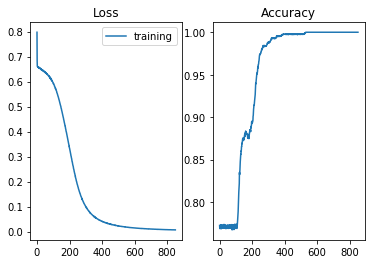

In [19]:
plt.figure(1)
plt.subplot(121)
plt.plot(range(len(tr_loss)), tr_loss, label='training')
plt.title('Loss')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(range(len(tr_acc)), tr_acc, label='training')
plt.title('Accuracy')

In [18]:
saver = tf.train.Saver()
#先指定主路徑
maindir="D:/TruckDriver/darkflow/mlp-training/"
if not os.path.isdir(maindir):
    os.makedirs(maindir)
    os.chdir(maindir)
else:
    os.chdir(maindir)
#再指定存檔相對路徑存檔
saver.save(sess, "saved_models/model.ckpt")

'saved_models/model.ckpt'

# Test data

In [24]:
'''rerun the graph first:
先回到上面將一開始和graph有關的cell先重新執行一遍，將graph架構先建立起來(這樣讀進來的參數才有對應位置存放)'''

path = "D:/TruckDriver/darkflow/mlp-training/"
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, path+"saved_models/model-800.ckpt") #到我們剛剛存檔的路徑將檔案叫出來，放入graph中對應的參數位置

INFO:tensorflow:Restoring parameters from D:/TruckDriver/darkflow/mlp-training/saved_models/model-800.ckpt


In [25]:
tf.global_variables()

[<tf.Variable 'hidden1/kernel:0' shape=(10000, 256) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'hidden2/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'hidden2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'hidden3/kernel:0' shape=(128, 64) dtype=float32_ref>,
 <tf.Variable 'hidden3/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'output/kernel:0' shape=(64, 2) dtype=float32_ref>,
 <tf.Variable 'output/bias:0' shape=(2,) dtype=float32_ref>]

In [26]:

# count = 0
# for f in os.listdir(path):
#     if 'jpg' in f:
#         img5 = cv2.imread(path+f,0)
#         img5 = cv2.resize(img5, (100,100))
#         img5 = img5.flatten()
#         test1 = np.array([]).reshape((0 ,img5.shape[0]))
#         test1 = np.row_stack([test1, img5.flatten()])
#         #test1 = img4
#         test1 /= 255.
#         #test1
#         #testy1 = np.array([]).reshape((0 ,y_train.shape[1]))
#         #testy1 = np.row_stack([testy1, class_y[0]])
#         tr_pred = sess.run([y_pred], feed_dict={input_data:test1,})
#         #print(f)
#         #print(str(count)+" : "+str(tr_pred))
#         print(f+" : "+str(tr_pred))
#         count+=1

In [27]:
predict = []
for i in range(len(x_test)):
    img = cv2.imread(x_test.img.iloc[i],0)
    img = cv2.resize(img,(100,100))
    img = img.flatten()
    x = np.array([]).reshape((0,img.shape[0]))
    x = np.row_stack([x, img])
    x /= 255
    tr_pred = sess.run([y_pred], feed_dict={input_data:x})
    print(x_test.img.iloc[i], tr_pred[0][0], y_test[i])
    #print(x_test.img.iloc[i], tr_pred, y_test[i])
    predict.append(np.argmax(tr_pred[0][0], axis=0))
    
acc = f1_score(np.argmax(y_test, axis=1),predict,average='binary')
#print(predict)
#print('-------------')
#print(np.argmax(y_test, axis=1))
print('f1-score:', acc)

paper-20180626_10_10.jpg [-1.4722905   0.81789076] [0 1]
cellphone-133.jpg [ 4.623906 -4.614324] [1 0]
paper-20180625_1_7.jpg [-4.845351   3.8122292] [0 1]
cup-20180628_0_2.jpg [-4.204884   3.2457898] [0 1]
cellphone-80.jpg [ 4.2766986 -4.3123565] [1 0]
cup-20180627_19_46.jpg [-3.395431   2.5198302] [0 1]
cellphone-96.jpg [ 3.3933024 -3.5230143] [1 0]
cellphone-31.jpg [ 3.8414583 -3.9219112] [1 0]
paper-20180626_2_48.jpg [-2.850533  2.048392] [0 1]
cellphone-125.jpg [ 4.701471  -4.6838584] [1 0]
cellphone-163.jpg [ 4.170058  -4.2173853] [1 0]
cellphone-92.jpg [ 3.1225512 -3.288376 ] [1 0]
cellphone-67.jpg [ 3.4985456 -3.618363 ] [1 0]
paper-20180625_5_78.jpg [-4.172176   3.2189152] [0 1]
paper-20180626_12_17.jpg [-3.3136265  2.455203 ] [0 1]
cellphone-148.jpg [ 2.3825212 -2.6225355] [1 0]
cup-20180628_5_78.jpg [-6.2270684  5.0260396] [0 1]
cup-20180628_2_51.jpg [-4.270013   3.3035448] [0 1]
paper-20180630_10_9.jpg [-3.6877532  2.787015 ] [0 1]
cellphone-172.jpg [ 3.8917987 -3.9647903] 

In [33]:
path = "D:/TruckDriver/darkflow/mlp-training/"
count = 0
for f in os.listdir(path):
    if 'jpg' in f:
        img5 = cv2.imread(path+f,0)
        img5 = cv2.resize(img5, (100,100))
        img5 = img5.flatten()
        test1 = np.array([]).reshape((0 ,img5.shape[0]))
        test1 = np.row_stack([test1, img5.flatten()])
        #test1 = img4
        test1 /= 255.
        #test1
        #testy1 = np.array([]).reshape((0 ,y_train.shape[1]))
        #testy1 = np.row_stack([testy1, class_y[0]])
        tr_pred = sess.run([y_pred], feed_dict={input_data:test1,})
        print(f)
        print(str(count)+" : "+str(tr_pred))
        count+=1

20180625_0_0.jpg
0 : [array([[-1.239364 ,  1.5875891]], dtype=float32)]
20180625_0_1.jpg
1 : [array([[-1.1156284,  1.4538001]], dtype=float32)]
20180625_0_2.jpg
2 : [array([[-1.2309467,  1.5774527]], dtype=float32)]
20180625_0_3.jpg
3 : [array([[-1.0982678,  1.4380491]], dtype=float32)]
20180625_10_10.jpg
4 : [array([[-1.6372783,  2.0249305]], dtype=float32)]
20180625_10_11.jpg
5 : [array([[-1.3872126,  1.7410325]], dtype=float32)]
20180625_10_8.jpg
6 : [array([[-1.4798462,  1.8443989]], dtype=float32)]
20180625_10_9.jpg
7 : [array([[-1.1318674,  1.4710613]], dtype=float32)]
20180625_11_12.jpg
8 : [array([[-1.2338104,  1.5779198]], dtype=float32)]
20180625_11_13.jpg
9 : [array([[-1.3472869,  1.7012212]], dtype=float32)]
20180625_11_14.jpg
10 : [array([[-0.11688039,  0.4021288 ]], dtype=float32)]
20180625_11_15.jpg
11 : [array([[-1.4613402,  1.8271477]], dtype=float32)]
20180625_12_16.jpg
12 : [array([[-1.2076211,  1.5632044]], dtype=float32)]
20180625_12_17.jpg
13 : [array([[-1.3309538

217 : [array([[-0.7599095,  1.073611 ]], dtype=float32)]
20180628_13_21.jpg
218 : [array([[-1.2595049,  1.6089123]], dtype=float32)]
20180628_13_22.jpg
219 : [array([[-1.257551 ,  1.6089233]], dtype=float32)]
20180628_13_23.jpg
220 : [array([[-1.2915468,  1.6408548]], dtype=float32)]
20180628_14_24.jpg
221 : [array([[-1.3260206,  1.6753997]], dtype=float32)]
20180628_14_25.jpg
222 : [array([[-1.1342663,  1.4670119]], dtype=float32)]
20180628_14_26.jpg
223 : [array([[-1.131784 ,  1.4780612]], dtype=float32)]
20180628_14_27.jpg
224 : [array([[-0.74288523,  1.0420551 ]], dtype=float32)]
20180628_15_28.jpg
225 : [array([[-0.97433794,  1.3065729 ]], dtype=float32)]
20180628_15_29.jpg
226 : [array([[-1.2591848,  1.605193 ]], dtype=float32)]
20180628_15_30.jpg
227 : [array([[-0.9452312,  1.2687935]], dtype=float32)]
20180628_15_31.jpg
228 : [array([[-0.8483841,  1.1589681]], dtype=float32)]
20180628_16_32.jpg
229 : [array([[-1.0081447,  1.336622 ]], dtype=float32)]
20180628_16_33.jpg
230 : [a

433 : [array([[-0.7259011,  1.0401636]], dtype=float32)]
cellphone-12.jpg
434 : [array([[ 0.395679  , -0.14072216]], dtype=float32)]
cellphone-120.jpg
435 : [array([[ 0.42773893, -0.1881621 ]], dtype=float32)]
cellphone-121.jpg
436 : [array([[-0.8651055,  1.1889058]], dtype=float32)]
cellphone-122.jpg
437 : [array([[-0.10500652,  0.3748406 ]], dtype=float32)]
cellphone-123.jpg
438 : [array([[0.24033137, 0.0141126 ]], dtype=float32)]
cellphone-124.jpg
439 : [array([[ 0.4073762 , -0.16032733]], dtype=float32)]
cellphone-125.jpg
440 : [array([[ 0.51065344, -0.2713757 ]], dtype=float32)]
cellphone-126.jpg
441 : [array([[ 0.43297216, -0.19200082]], dtype=float32)]
cellphone-127.jpg
442 : [array([[ 0.4556128 , -0.21016733]], dtype=float32)]
cellphone-128.jpg
443 : [array([[ 0.56200755, -0.3275432 ]], dtype=float32)]
cellphone-129.jpg
444 : [array([[ 0.32215077, -0.07021409]], dtype=float32)]
cellphone-13.jpg
445 : [array([[-0.6429329,  0.9448004]], dtype=float32)]
cellphone-130.jpg
446 : [ar

645 : [array([[-1.3041916,  1.6565531]], dtype=float32)]
cup-20180628_14_24.jpg
646 : [array([[-1.4370708,  1.8013006]], dtype=float32)]
cup-20180628_14_25.jpg
647 : [array([[-1.4028288,  1.7641765]], dtype=float32)]
cup-20180628_14_26.jpg
648 : [array([[-1.1156243,  1.4521463]], dtype=float32)]
cup-20180628_14_27.jpg
649 : [array([[-1.4661521,  1.8327897]], dtype=float32)]
cup-20180628_15_28.jpg
650 : [array([[-1.3895795,  1.7488565]], dtype=float32)]
cup-20180628_15_29.jpg
651 : [array([[-1.2834609,  1.6350952]], dtype=float32)]
cup-20180628_15_30.jpg
652 : [array([[-1.3464713,  1.7041411]], dtype=float32)]
cup-20180628_15_31.jpg
653 : [array([[-1.4158117,  1.7788905]], dtype=float32)]
cup-20180628_16_32.jpg
654 : [array([[-1.4207555,  1.7830113]], dtype=float32)]
cup-20180628_16_33.jpg
655 : [array([[-0.5171465,  0.8351196]], dtype=float32)]
cup-20180628_16_34.jpg
656 : [array([[-1.2404628,  1.5871758]], dtype=float32)]
cup-20180628_16_35.jpg
657 : [array([[-1.4476185,  1.8126515]],

845 : [array([[-0.16308224,  0.45230436]], dtype=float32)]
paper-20180629_24_68.jpg
846 : [array([[-0.13753253,  0.42823103]], dtype=float32)]
paper-20180630_0_0.jpg
847 : [array([[-0.965272 ,  1.2915962]], dtype=float32)]
paper-20180630_0_1.jpg
848 : [array([[-1.0306765,  1.3731645]], dtype=float32)]
paper-20180630_0_2.jpg
849 : [array([[-0.88288796,  1.2125    ]], dtype=float32)]
paper-20180630_0_3.jpg
850 : [array([[-0.9056346,  1.2316298]], dtype=float32)]
paper-20180630_10_10.jpg
851 : [array([[-1.089932 ,  1.4302689]], dtype=float32)]
paper-20180630_10_11.jpg
852 : [array([[-1.0220884,  1.3599321]], dtype=float32)]
paper-20180630_10_8.jpg
853 : [array([[-1.0731422,  1.4143358]], dtype=float32)]
paper-20180630_10_9.jpg
854 : [array([[-1.1015687,  1.4455788]], dtype=float32)]
paper-20180630_11_12.jpg
855 : [array([[-1.0448935,  1.384747 ]], dtype=float32)]
paper-20180630_12_16.jpg
856 : [array([[-1.0093195,  1.3425325]], dtype=float32)]
paper-20180630_12_17.jpg
857 : [array([[-1.02

In [23]:
saver = tf.train.Saver()
#先指定主路徑
maindir="D:/TruckDriver/darkflow/mlp-training/"
if not os.path.isdir(maindir):
    os.makedirs(maindir)
    os.chdir(maindir)
else:
    os.chdir(maindir)
#再指定存檔相對路徑存檔
saver.save(sess, "saved_models/model.ckpt")

'saved_models/model.ckpt'